# Module 3 - Exercise 0: Training Basics

## Learning Objectives
- Generate and visualize a synthetic classification dataset
- Split data into training, validation, and test sets
- Build a simple neural network for binary classification
- Select appropriate loss function and optimizer
- Implement a basic training loop
- Visualize decision boundaries
- Evaluate model performance on test data

## Environment Setup

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check CUDA availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


## Section 1: Dataset Generation and Visualization

We'll start by generating a circles dataset - a classic non-linearly separable classification problem. This dataset consists of two concentric circles, where points from each circle belong to different classes.

In [2]:
# TODO: Generate a circles dataset with 1000 samples, noise=0.1, and factor=0.5
# Use make_circles function from sklearn.datasets import make_circles X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)


# Verify the shapes
print(f"Features shape: {X.shape if X is not None else 'Not generated'}")
print(f"Labels shape: {y.shape if y is not None else 'Not generated'}")
print(f"Unique labels: {np.unique(y) if y is not None else 'Not generated'}")

Features shape: (1000, 2)
Labels shape: (1000,)
Unique labels: [0 1]


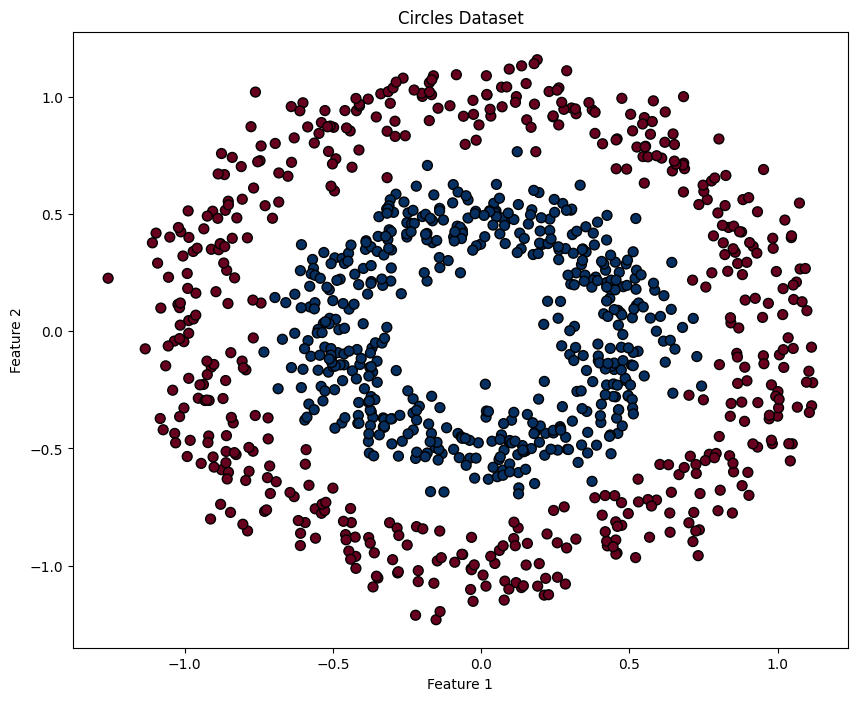

In [4]:
# TODO: Visualize the dataset
# Create a scatter plot with different colors for each class
11111111111111111111111111111111111111111111111
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolor='black', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Circles Dataset')
plt.show()

## Section 2: Data Splitting

Proper data splitting is crucial for evaluating model performance. We need:
- **Training set**: For learning model parameters
- **Validation set**: For hyperparameter tuning and monitoring during training
- **Test set**: For final unbiased evaluation

**Question**: Why is it important to have separate validation and test sets? What problems could arise if we only used training and test sets?

In [5]:
# TODO: Split the data into train (60%), validation (20%), and test (20%) sets
# First split into train+val and test, then split train+val into train and val
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp,test_size=0.25,random_state=42)

# Verify the splits
print(f"Training set: {X_train.shape if X_train is not None else 'Not split'}")
print(f"Validation set: {X_val.shape if X_val is not None else 'Not split'}")
print(f"Test set: {X_test.shape if X_test is not None else 'Not split'}")

Training set: (600, 2)
Validation set: (200, 2)
Test set: (200, 2)


In [17]:
# TODO: Convert numpy arrays to PyTorch tensors and move to device
X_train_tensor = torch.from_numpy(X_train).to(device).float()
y_train_tensor = torch.from_numpy(y_train).to(device).float()
X_val_tensor = torch.from_numpy(X_val).to(device).float()
y_val_tensor = torch.from_numpy(y_val).to(device).float()
X_test_tensor = torch.from_numpy(X_test).to(device).float()
y_test_tensor = torch.from_numpy(y_test).to(device).float()

print(f"Tensors created: {X_train_tensor is not None}")
print(f"Device: {X_train_tensor.device if X_train_tensor is not None else 'Not created'}")

Tensors created: True
Device: cuda:0


## Section 3: Model Architecture

For this non-linearly separable problem, we need a neural network with at least one hidden layer. The network should:
- Accept 2D input (two features)
- Have hidden layers with non-linear activations
- Output a single value for binary classification

**Question**: Why do we need non-linear activation functions? What would happen if we only used linear layers?

In [18]:
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=16):
        super(BinaryClassifier, self).__init__()
        # TODO: Define the network architecture
        # Suggested: 2 -> 16 -> 8 -> 1
        # Use ReLU activations for hidden layers
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16,8)
        self.fc3 = nn.Linear(8,1)
        self.relu = nn.ReLU()


    def forward(self, x):
        # TODO: Implement the forward pass
        # Apply layers and activations
        return self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))

# TODO: Instantiate the model and move to device
model = BinaryClassifier().to(device)

# Display model architecture
if model is not None:
    print(model)
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total parameters: {total_params}")

BinaryClassifier(
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)
Total parameters: 193


## Section 4: Loss Function and Optimizer

For binary classification, we need to choose:
- **Loss function**: Measures how wrong our predictions are
- **Optimizer**: Updates model parameters to minimize the loss

**Question**: Binary Cross-Entropy Loss is commonly used for binary classification. What is the mathematical formula for BCE loss? Why is it suitable for this task?

In [19]:
# TODO: Define the loss function (Binary Cross-Entropy with Sigmoid)
criterion = nn.BCEWithLogitsLoss()

# TODO: Define the optimizer (Adam with learning rate 0.01)
optimizer = optim.Adam(model.parameters(), lr=0.01)

print(f"Loss function: {type(criterion).__name__ if criterion is not None else 'Not defined'}")
print(f"Optimizer: {type(optimizer).__name__ if optimizer is not None else 'Not defined'}")

Loss function: BCEWithLogitsLoss
Optimizer: Adam


## Section 5: Training Loop

The training loop is the core of the learning process. Each epoch consists of:
1. Forward pass: Compute predictions
2. Loss calculation: Measure error
3. Backward pass: Compute gradients
4. Parameter update: Adjust weights

We'll also track validation loss to monitor for overfitting.

In [21]:
# Training configuration
num_epochs = 100
train_losses = []
val_losses = []

# TODO: Implement the training loop
for epoch in range(num_epochs):
    # Training phase
    model.train()

    # TODO: Forward pass on training data
    outputs = model(X_train_tensor)

    # TODO: Calculate training loss
    train_loss = criterion(outputs, y_train_tensor.unsqueeze(1).float())

    # TODO: Backward pass and optimization
    # Remember to zero gradients, backward, and step
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    # Validation phase
    model.eval()
    with torch.no_grad():
        # TODO: Calculate validation loss
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor.unsqueeze(1))

    # Store losses
    if train_loss is not None and val_loss is not None:
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

    # Print progress every 20 epochs
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [20/100], Train Loss: 0.6424, Val Loss: 0.6476
Epoch [40/100], Train Loss: 0.4891, Val Loss: 0.5074
Epoch [60/100], Train Loss: 0.2537, Val Loss: 0.2928
Epoch [80/100], Train Loss: 0.1011, Val Loss: 0.1458
Epoch [100/100], Train Loss: 0.0501, Val Loss: 0.0905


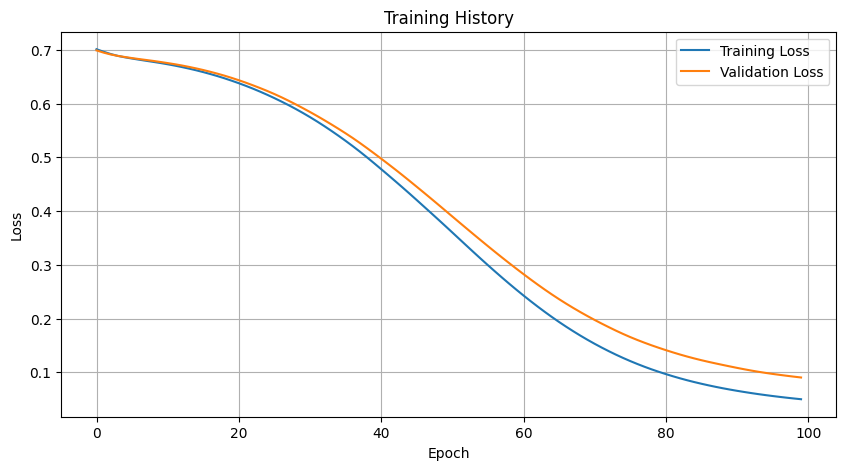

In [22]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

## Section 6: Decision Boundary Visualization

Visualizing the decision boundary helps us understand what the model has learned. For each point in a grid, we'll predict its class and color the region accordingly.

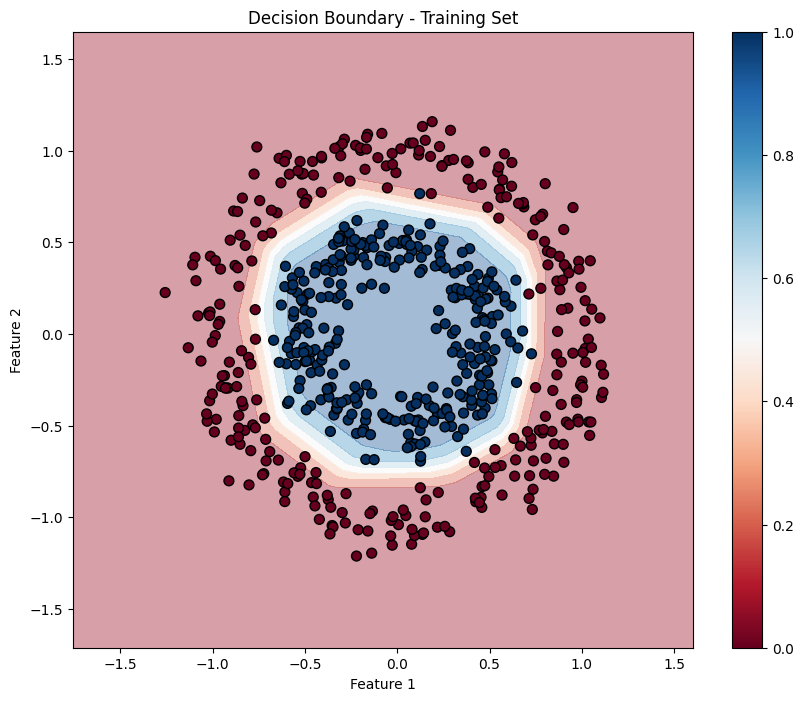

In [24]:
def plot_decision_boundary(model, X, y, title='Decision Boundary'):
    # Create a mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # TODO: Predict on the mesh grid
    # Flatten xx and yy, create tensor, get predictions, reshape back
    grid_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).to(device).float()
    with torch.no_grad():
        predictions = model(grid_tensor).cpu().numpy()
    predictions = predictions.reshape(xx.shape)

    model.eval()
    with torch.no_grad():
        logits = model(grid_tensor)
        # Apply sigmoid to get probabilities
        Z = torch.sigmoid(logits).cpu().numpy().reshape(xx.shape) # Get predictions and apply sigmoid

    # Plot the contour and data points
    plt.figure(figsize=(10, 8))
    if Z is not None:
        plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolor='black', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar()
    plt.show()

# TODO: Plot decision boundary for training data
if model is not None and X_train is not None:
    plot_decision_boundary(model, X_train, y_train, 'Decision Boundary - Training Set')

## Section 7: Model Evaluation

Finally, we evaluate our model on the test set to get an unbiased estimate of its performance.

**Question**: Why is it important to evaluate on a test set that wasn't used during training or validation?

In [25]:
# TODO: Evaluate model on test set
model.eval()
with torch.no_grad():
    # TODO: Get predictions for test set
    test_outputs = model(X_test_tensor)
    test_predictions = torch.sigmoid(test_outputs)  # Apply sigmoid and threshold at 0.5

    # TODO: Calculate test accuracy
    test_accuracy = (test_predictions.round() == y_test_tensor.unsqueeze(1)).float().mean()

    # TODO: Calculate test loss
    test_loss = criterion(test_outputs, y_test_tensor.unsqueeze(1))

print(f"Test Loss: {test_loss.item() if test_loss is not None else 'Not calculated':.4f}")
print(f"Test Accuracy: {test_accuracy if test_accuracy is not None else 'Not calculated':.2%}")

Test Loss: 0.0905
Test Accuracy: 98.00%


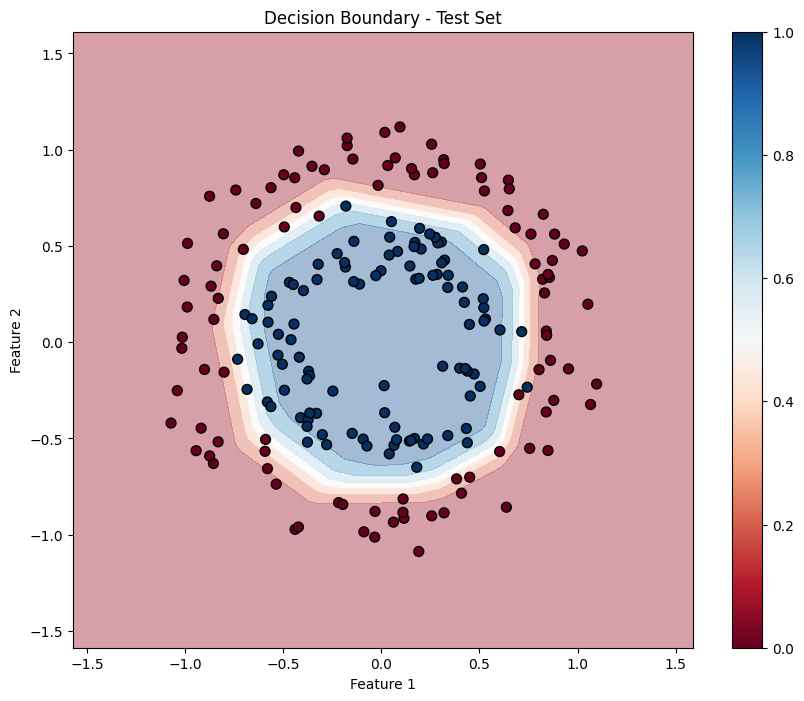

In [26]:
# TODO: Plot decision boundary for test data
if model is not None and X_test is not None:
    plot_decision_boundary(model, X_test, y_test, 'Decision Boundary - Test Set')